In [1]:
# -----------------------------------------------
# 📦 Library Imports - Data Handling & Utilities
# -----------------------------------------------

import pandas as pd                      # For data manipulation
import numpy as np                       # For numerical computations
import joblib                            # For saving and loading models
import matplotlib.pyplot as plt          # For plotting
import seaborn as sns                    # For advanced data visualization

# -----------------------------------------------
# 🤖 Machine Learning - Scikit-learn Modules
# -----------------------------------------------

from sklearn.model_selection import train_test_split     # For splitting data into train/test
from sklearn.ensemble import RandomForestRegressor       # Random Forest regression model
from sklearn.metrics import (                            # Evaluation metrics
    r2_score,
    mean_squared_error,
    mean_absolute_error
)
from sklearn.model_selection import (                    # Model selection tools
    RandomizedSearchCV,
    cross_val_score,
    learning_curve
)

# ---------------------------------------------------
# 🧪 Optimization & Statistical Tools
# ---------------------------------------------------

from scipy.stats import randint             # For hyperparameter sampling
import shap                                 # For model explainability (SHAP values)
from scipy.special import softmax           # For transforming logits to probabilities
!pip install optuna                              # Hyperparameter optimization framework
import optuna                        # Ensure Optuna is installed in the Colab environment

# ---------------------------------------------------
# 📁 Google Colab Utilities (e.g. download/upload)
# ---------------------------------------------------

from google.colab import files              # To upload or download files in Colab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 21.7 MB/s eta 0:00:00


In [3]:
# 📁 Upload local file(s) from your computer into the Colab environment
uploaded = files.upload()

Saving HEPATITIS_pIC50_morgan_fp01.csv to HEPATITIS_pIC50_morgan_fp01.csv


In [4]:
# 📄 Load the dataset containing fingerprints and bioactivity data
df1 = pd.read_csv("HEPATITIS_pIC50_morgan_fp01.csv")

# 👀 Display the first few rows of the DataFrame in a readable format (Colab/Jupyter)
display(df1)

,FP0,FP1,FP2,FP4,FP5,FP8,FP9,FP13,FP14,FP15,...,FP2021,FP2032,FP2033,FP2034,FP2035,FP2041,FP2042,FP2045,pIC50,bioactivity_class
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.356547,Intermediate
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.677781,Intermediate
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.337242,Active
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7.522879,Active
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.602060,Inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.823909,Intermediate
2578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7.619789,Active
2579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.065502,Active
2580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.701147,Intermediate


In [5]:
# 🎯 Separate features (X) and target variable (y)
X = df1.drop(["pIC50", "bioactivity_class"], axis=1)   # Drop the target column to keep only predictors
y = df1["pIC50"]                # Target: bioactivity (pIC50 values)



In [6]:
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS, add_constant
import numpy as np
import pandas as pd

# Suponha que X e y já estejam definidos
X_const = add_constant(X)  # Adiciona a constante (intercepto)
ols_model = OLS(y, X_const).fit()  # Ajusta o modelo OLS

#https://online.stat.psu.edu/stat501/lesson/11/11.5
#https://communities.sas.com/t5/Statistical-Procedures/Outlier-Detection-using-Studentized-Residuals-in-Different/td-p/529611

# Calcula os resíduos studentizados externamente
influence = ols_model.get_influence()
studentized_residuals = influence.resid_studentized_external

# Identifica outliers com |t| > 1.645 (nível de 90% de confiança bilateral)
limite_outlier = 1.645
outliers_idx = np.where(np.abs(studentized_residuals) > limite_outlier)[0]

# (Opcional) Exibe os índices dos outliers e os resíduos correspondentes
outliers = pd.DataFrame({
    "Índice": outliers_idx,
    "Resíduo studentizado": studentized_residuals[outliers_idx]
})



/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:847: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:847: RuntimeWarning: divide by zero encountered in divide
  return self.resid / sigma / np.sqrt(1 - hii)


In [7]:
print(outliers)

     Índice  Resíduo studentizado
0         3              1.799569
1        27              2.805465
2        28             -2.153584
3        42             -3.284806
4        47              2.190429
..      ...                   ...
207    2488             -1.820439
208    2496             -1.849129
209    2516             -1.732384
210    2521             -1.991597
211    2545              1.917968

[212 rows x 2 columns]


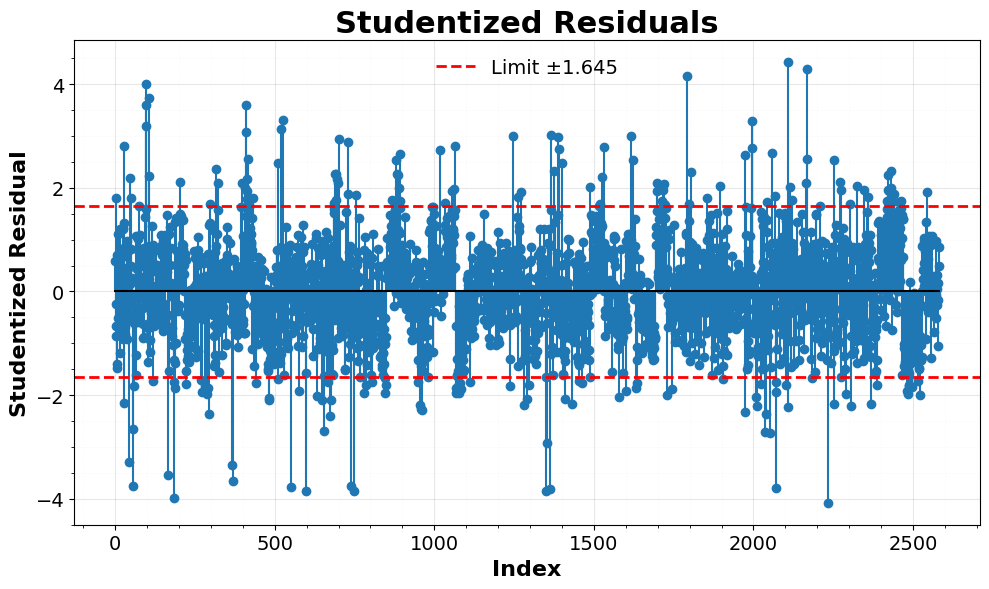

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

(markerline, stemlines, baseline) = plt.stem(studentized_residuals, linefmt='C0-', markerfmt='C0o', basefmt="k-")
plt.setp(markerline, markersize=6)
plt.setp(stemlines, linewidth=1.5)

# Reference lines for ±1.645 (90% confidence level)
plt.axhline(1.645, color='red', linestyle='--', linewidth=2, label='Limit ±1.645')
plt.axhline(-1.645, color='red', linestyle='--', linewidth=2)

plt.title("Studentized Residuals", fontsize=22, fontweight='bold')
plt.xlabel("Index", fontsize=16, fontweight='bold')
plt.ylabel("Studentized Residual", fontsize=16, fontweight='bold')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True, which='major', linestyle='-', linewidth=0.75, alpha=0.3)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth=0.4, alpha=0.15)
plt.gca().set_axisbelow(True)

plt.legend(fontsize=14, frameon=False)
plt.tight_layout()

plt.savefig("studentized_residuals.pdf", dpi=300)
plt.show()


In [11]:
X_sem_outliers = X.iloc[~X.index.isin(outliers_idx)]
y_sem_outliers = y.iloc[~y.index.isin(outliers_idx)]


In [12]:
X_sem_outliers

,FP0,FP1,FP2,FP4,FP5,FP8,FP9,FP13,FP14,FP15,...,FP2017,FP2018,FP2021,FP2032,FP2033,FP2034,FP2035,FP2041,FP2042,FP2045
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y_sem_outliers

,pIC50
0,5.356547
1,5.677781
2,6.337242
4,4.602060
5,5.154902
...,...
2577,5.823909
2578,7.619789
2579,6.065502
2580,5.701147


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Remove os outliers
X_clean = X.iloc[~X.index.isin(outliers_idx)]
y_clean = y.iloc[~y.index.isin(outliers_idx)]

# 2. Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=42)

# 3. Treina o modelo RandomForest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# 4. Faz previsões
y_pred = rf.predict(X_test)

# 5. Avalia o desempenho
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 0.4467
R² Score: 0.7301


In [15]:

# 4. Previsões
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# 5. Avaliação
print("=== Conjunto de Treino ===")
print(f"R² (train): {r2_score(y_train, y_train_pred):.4f}")
print(f"MSE (train): {mean_squared_error(y_train, y_train_pred):.4f}")

print("\n=== Conjunto de Teste ===")
print(f"R² (test): {r2_score(y_test, y_test_pred):.4f}")
print(f"MSE (test): {mean_squared_error(y_test, y_test_pred):.4f}")

# 6. (Opcional) Criar DataFrames com as previsões
df_pred_train = pd.DataFrame({
    "y_treino_real": y_train.values,
    "y_treino_predito": y_train_pred
})

df_pred_test = pd.DataFrame({
    "y_teste_real": y_test.values,
    "y_teste_predito": y_test_pred
})

print("\nPrevisões - Treino:")
print(df_pred_train.head())

print("\nPrevisões - Teste:")
print(df_pred_test.head())

=== Conjunto de Treino ===
R² (train): 0.9300
MSE (train): 0.1164

=== Conjunto de Teste ===
R² (test): 0.7301
MSE (test): 0.4467

Previsões - Treino:
   y_treino_real  y_treino_predito
0       4.935542          5.021810
1       4.000000          4.546935
2       6.920819          6.770279
3       2.781386          3.239771
4       4.600326          4.709123

Previsões - Teste:
   y_teste_real  y_teste_predito
0      4.000000         4.530792
1      3.795880         4.059976
2      4.491201         4.448507
3      3.078173         3.421542
4      4.851089         5.543381


In [16]:
# Resíduos do conjunto de teste
residuos_test = y_test - y_test_pred

# (Opcional) Resíduos do treino, se quiser analisar também
residuos_train = y_train - y_train_pred


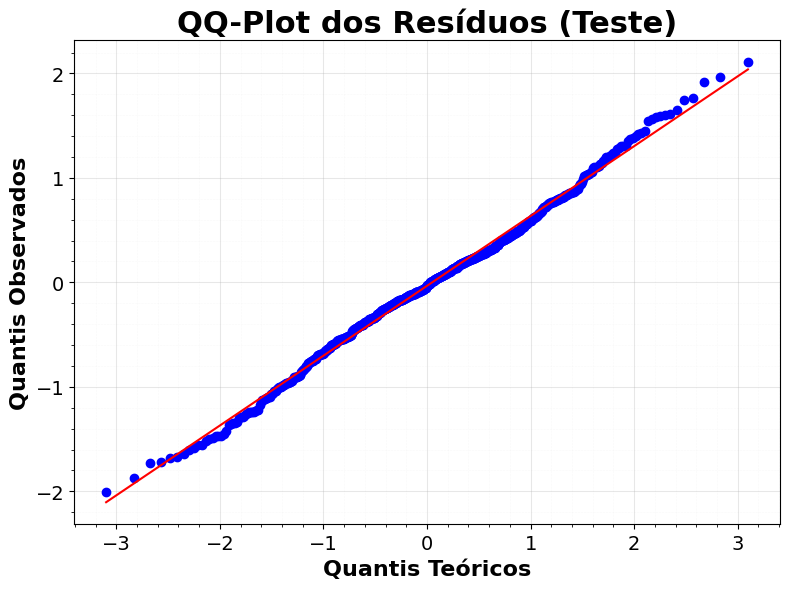

In [17]:
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.figure(figsize=(8, 6))

stats.probplot(residuos_test, dist="norm", plot=plt)

plt.title("QQ-Plot dos Resíduos (Teste)", fontsize=22, fontweight='bold')
plt.xlabel("Quantis Teóricos", fontsize=16, fontweight='bold')
plt.ylabel("Quantis Observados", fontsize=16, fontweight='bold')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True, which='major', linestyle='-', linewidth=0.75, alpha=0.3)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth=0.4, alpha=0.15)
plt.gca().set_axisbelow(True)

plt.tight_layout()
plt.show()



In [19]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# ---------------------------------------------------
# 🎯 Função Objetivo para Otimização com Optuna
# ---------------------------------------------------
def objective(trial):
    """
    Função objetivo para o Optuna otimizar os hiperparâmetros do RandomForestRegressor,
    usando validação cruzada de 10 folds no conjunto de treino sem outliers.

    Retorna:
        float: Média do R² obtido nos folds de validação
    """
    # 🔧 Espaço de busca dos hiperparâmetros
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_categorical('max_depth', [None] + list(range(10, 51, 10))),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }

    # 🧠 Modelo com os parâmetros sugeridos
    model = RandomForestRegressor(**params, random_state=42, n_jobs=-1)

    # 🔄 Validação cruzada em 10 folds
    score = cross_val_score(model, X_train, y_train, cv=10, scoring='r2', n_jobs=-1)

    # 📈 Retorna o R² médio dos 10 folds
    return np.mean(score)


In [20]:
# -----------------------------------------------------
# 🚀 Run Optuna Hyperparameter Optimization Study
# -----------------------------------------------------

study = optuna.create_study(
    direction='maximize',                        # Maximize R2 score
    sampler=optuna.samplers.TPESampler(),       # Use Tree-structured Parzen Estimator sampler
    pruner=optuna.pruners.MedianPruner(n_startup_trials=10)  # Early stopping of unpromising trials
)

# 🔎 Execute optimization for 100 trials
study.optimize(objective, n_trials=100)

# 🏆 Display best hyperparameters found by Optuna
print("Best Optuna params:", study.best_params)

[I 2025-07-28 12:26:55,794] A new study created in memory with name: no-name-94f39b0b-dbdd-4ee4-b274-4ad48695b134
[I 2025-07-28 12:26:59,180] Trial 0 finished with value: 0.5680911852425901 and parameters: {'n_estimators': 407, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.5680911852425901.
[I 2025-07-28 12:27:01,019] Trial 1 finished with value: 0.6937353362982998 and parameters: {'n_estimators': 214, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False}. Best is trial 1 with value: 0.6937353362982998.
[I 2025-07-28 12:27:02,074] Trial 2 finished with value: 0.6630908069455648 and parameters: {'n_estimators': 242, 'max_depth': 30, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.6937353362982998.
[I 2025-07-28 12:27:02,720] Trial 3 finished with value: 0.63561149614628

Best Optuna params: {'n_estimators': 242, 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}


In [21]:
# --------------------------------------------------------
# 🏅 Treinamento do Melhor Modelo com Parâmetros do Optuna
# --------------------------------------------------------

# 🔑 Recupera os melhores hiperparâmetros encontrados pelo Optuna
best_params_optuna = study.best_params

# 🧠 Inicializa o Random Forest com os hiperparâmetros otimizados
best_model_optuna = RandomForestRegressor(
    **best_params_optuna,
    random_state=42,
    n_jobs=-1
)

# 🔄 Treina o modelo no conjunto de treino (sem outliers)
best_model_optuna.fit(X_train, y_train)

# ✅ (Opcional) Previsões e avaliação
y_train_pred_best = best_model_optuna.predict(X_train)
y_test_pred_best = best_model_optuna.predict(X_test)



In [22]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Calculando métricas

# R²
r2_train = r2_score(y_train, y_train_pred_best)
r2_test = r2_score(y_test, y_test_pred_best)

# MSE
mse_train = mean_squared_error(y_train, y_train_pred_best)
mse_test = mean_squared_error(y_test, y_test_pred_best)

# RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Imprimir métricas
print("=== Desempenho Final com Modelo Otimizado ===")
print(f"R² (Treino): {r2_train:.2f}")
print(f"R² (Teste):  {r2_test:.2f}")
print(f"MSE (Treino): {mse_train:.2f}")
print(f"MSE (Teste):  {mse_test:.2f}")
print(f"RMSE (Treino): {rmse_train:.2f}")
print(f"RMSE (Teste):  {rmse_test:.2f}")


=== Desempenho Final com Modelo Otimizado ===
R² (Treino): 0.90
R² (Teste):  0.74
MSE (Treino): 0.16
MSE (Teste):  0.42
RMSE (Treino): 0.40
RMSE (Teste):  0.65


In [23]:
import joblib

# Salvar o modelo
joblib.dump(best_model_optuna, 'random_forest_model_final.joblib')
joblib.dump(best_model_optuna, 'random_forest_model_final.pkl')

print("Modelo salvo com sucesso!")


Modelo salvo com sucesso!


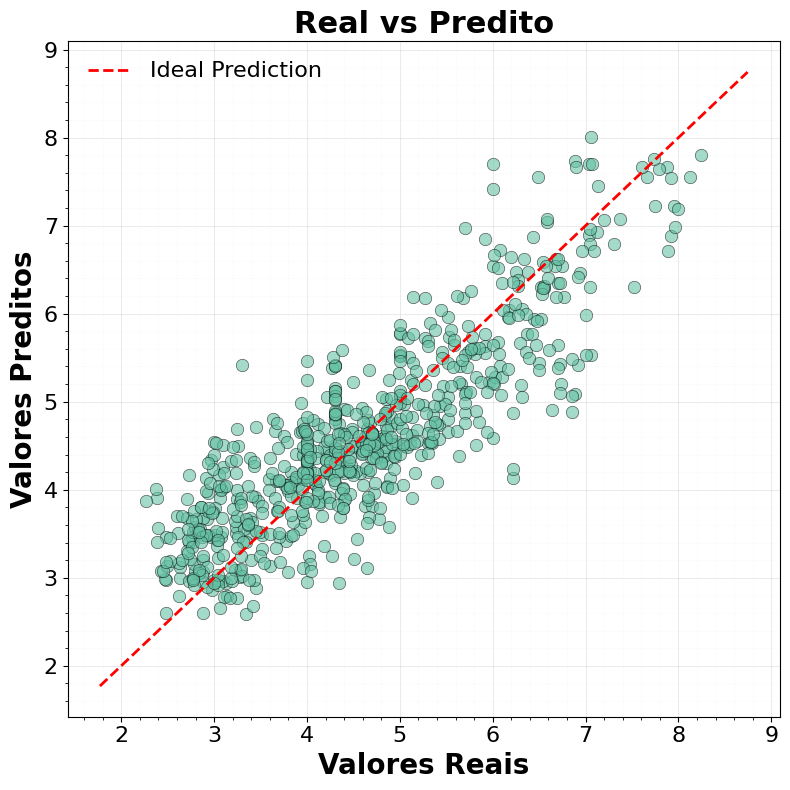

In [24]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 8))

plt.scatter(y_test, y_test_pred_best, alpha=0.6, color="#66c2a5", edgecolor='black', linewidth=0.5, s=80)

# Linha ideal y = x
min_val = min(y_test.min(), y_test_pred_best.min()) - 0.5
max_val = max(y_test.max(), y_test_pred_best.max()) + 0.5
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label="Ideal Prediction")

plt.xlabel("Valores Reais", fontsize=20, fontweight='bold')
plt.ylabel("Valores Preditos", fontsize=20, fontweight='bold')
plt.title("Real vs Predito", fontsize=22, fontweight='bold')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True, which='major', linestyle='-', linewidth=0.75, alpha=0.25)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth=0.4, alpha=0.15)
plt.gca().set_axisbelow(True)

plt.legend(fontsize=16, frameon=False)

plt.tight_layout()
plt.show()


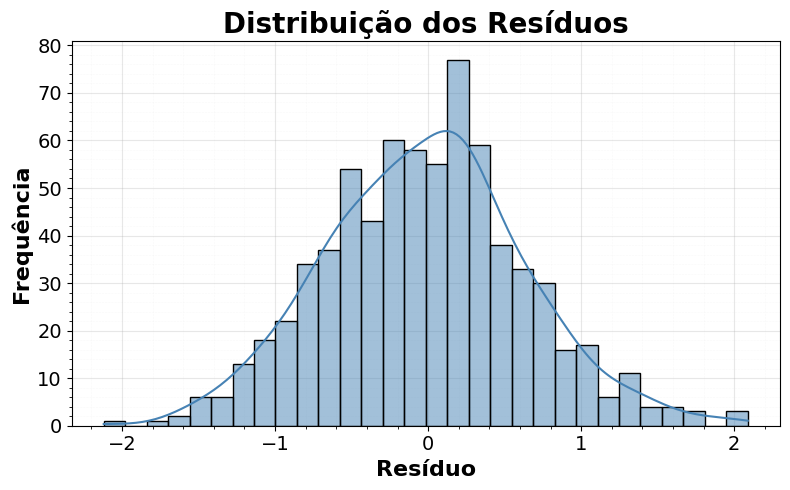

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

residuos = y_test - y_test_pred_best

plt.figure(figsize=(8, 5))

sns.histplot(residuos, kde=True, bins=30, color="#4682b4",  # steelblue com hex
             line_kws={'linewidth': 1.5})

plt.title("Distribuição dos Resíduos", fontsize=20, fontweight='bold')
plt.xlabel("Resíduo", fontsize=16, fontweight='bold')
plt.ylabel("Frequência", fontsize=16, fontweight='bold')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True, which='major', linestyle='-', linewidth=0.8, alpha=0.3)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth=0.4, alpha=0.15)
plt.gca().set_axisbelow(True)

plt.tight_layout()
plt.show()


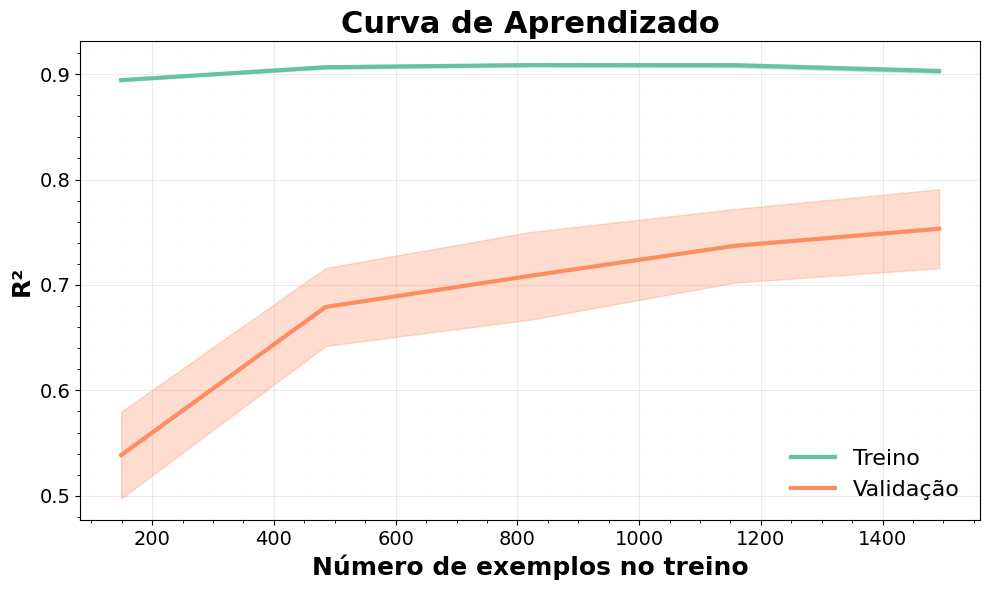

In [26]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    best_model_optuna, X_train, y_train, cv=10, scoring='r2', n_jobs=-1
)

# Média e desvio padrão dos scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))

# Linha e faixa de confiança do treino
plt.plot(train_sizes, train_mean, color="#66c2a5", linewidth=3, label="Treino")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                 color="#66c2a5", alpha=0.3)

# Linha e faixa de confiança da validação
plt.plot(train_sizes, test_mean, color="#fc8d62", linewidth=3, label="Validação")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                 color="#fc8d62", alpha=0.3)

# Configurações estéticas
plt.xlabel("Número de exemplos no treino", fontsize=18, fontweight='bold')
plt.ylabel("R²", fontsize=18, fontweight='bold')
plt.title("Curva de Aprendizado", fontsize=22, fontweight='bold')
plt.legend(fontsize=16, frameon=False, loc='lower right')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True, which='major', linestyle='-', linewidth=0.75, alpha=0.25)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth=0.4, alpha=0.15)
plt.gca().set_axisbelow(True)

plt.tight_layout()

plt.savefig("Curva_aprendizado.pdf", dpi=300)

plt.show()


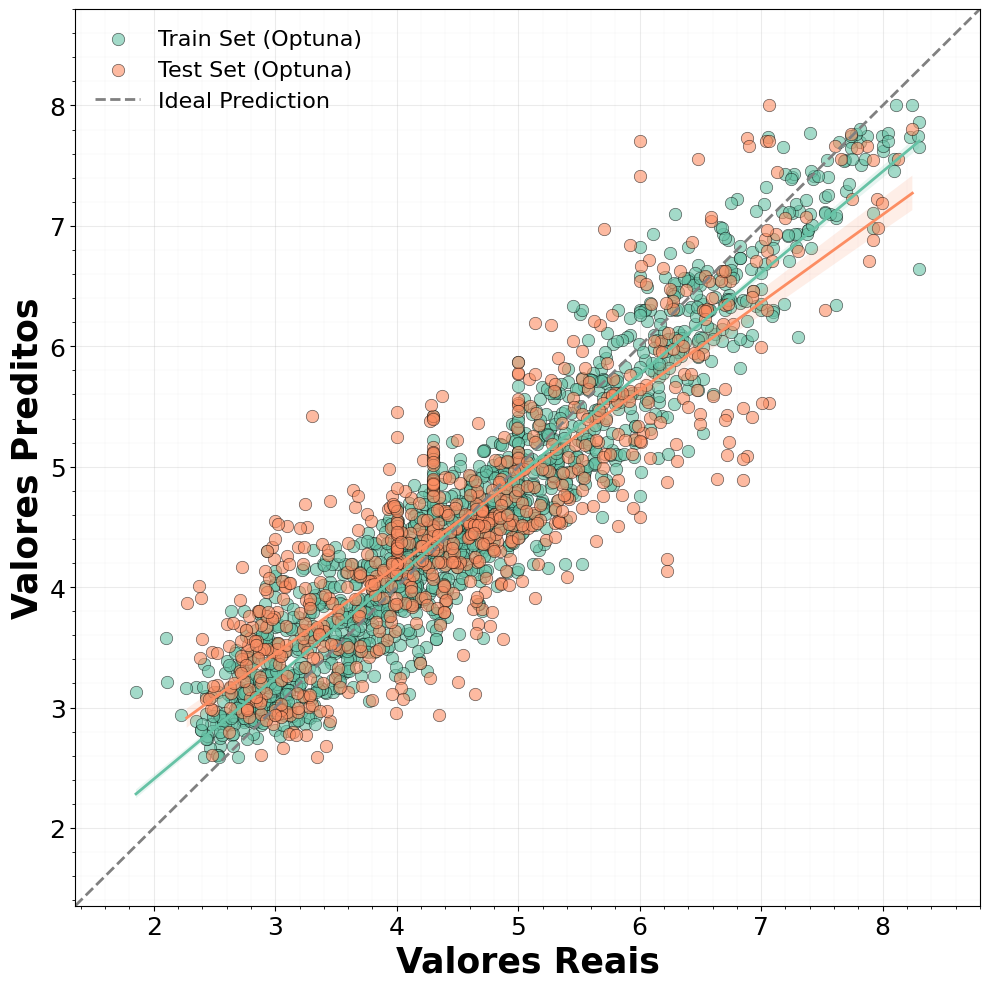

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))  # Formato quadrado e grande

# 🟢 Regression plot para predições do treino
sns.regplot(
    x=y_train, y=y_train_pred_best,
    scatter_kws={
        "color": "#66c2a5",         # verde claro para treino
        "alpha": 0.6,
        "edgecolor": "black",
        "linewidths": 0.5,
        "s": 80
    },
    line_kws={"color": "#66c2a5", "linewidth": 2},
    label='Train Set (Optuna)'
)

# 🟠 Regression plot para predições do teste
sns.regplot(
    x=y_test, y=y_test_pred_best,
    scatter_kws={
        "color": "#fc8d62",         # laranja para teste
        "alpha": 0.6,
        "edgecolor": "black",
        "linewidths": 0.5,
        "s": 80
    },
    line_kws={"color": "#fc8d62", "linewidth": 2},
    label='Test Set (Optuna)'
)

# ➖ Linha ideal (y = x)
min_val = min(
    y_train.min(), y_test.min(),
    y_train_pred_best.min(), y_test_pred_best.min()
) - 0.5

max_val = max(
    y_train.max(), y_test.max(),
    y_train_pred_best.max(), y_test_pred_best.max()
) + 0.5

plt.plot(
    [min_val, max_val], [min_val, max_val],
    linestyle='--',
    color='gray',
    linewidth=2,
    label='Ideal Prediction'
)

# 🖋 Título e rótulos
plt.xlabel('Valores Reais', fontsize=25, fontweight='bold')
plt.ylabel('Valores Preditos', fontsize=25, fontweight='bold')

# 📋 Legenda
plt.legend(frameon=False, loc='upper left', fontsize=16)

# 📏 Ticks
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# 📐 Limites
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# 🗺 Grade suave
plt.grid(True, which='major', linestyle='-', linewidth=0.75, alpha=0.25)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle='-', linewidth=0.25, alpha=0.15)
plt.gca().set_axisbelow(True)

# 🧹 Layout limpo
plt.tight_layout()

# Salvar arquivo PDF
plt.savefig("Regressao_Final.pdf", dpi=300)

# Mostrar gráfico
plt.show()


In [ ]:
!pip install shap


In [ ]:
import shap
import matplotlib.pyplot as plt

# Criar objeto explainer para RandomForest (TreeExplainer é ideal para modelos de árvore)
explainer = shap.TreeExplainer(best_model_optuna)

# Calcular valores SHAP para o conjunto de treino (X_train)
shap_values = explainer.shap_values(X_train)



In [ ]:
feature_idx = 0  # índice ou nome da feature
plt.figure(figsize=(8, 6))
shap.dependence_plot(feature_idx, shap_values, X_train, show=False)
plt.tight_layout()
plt.savefig(f"shap_dependence_feature_{feature_idx}.pdf", dpi=300)
plt.show()


In [ ]:
# Para visualização interativa (no notebook)
shap.initjs()
sample_idx = 0  # exemplo de índice

shap.force_plot(explainer.expected_value, shap_values[sample_idx,:], X_train.iloc[sample_idx,:])


In [ ]:
sample_idx = 0  # índice da amostra
plt.figure(figsize=(8, 6))
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[sample_idx], feature_names=X_train.columns, show=False)
plt.tight_layout()
plt.savefig(f"shap_waterfall_sample_{sample_idx}.pdf", dpi=300)
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
shap.plots.bar(shap_values, max_display=10, show=False)
plt.tight_layout()
plt.savefig("shap_bar_custom.pdf", dpi=300)
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
shap.decision_plot(explainer.expected_value, shap_values[:50], X_train.iloc[:50], show=False)
plt.tight_layout()
plt.savefig("shap_decision_plot.pdf", dpi=300)
plt.show()


In [ ]:
shap_interaction_values = explainer.shap_interaction_values(X_train)

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_interaction_values, X_train, plot_type="heatmap", show=False)
plt.tight_layout()
plt.savefig("shap_interaction_heatmap.pdf", dpi=300)
plt.show()


In [ ]:
# ---------------------------------------------------
# 🗜️ Compress all CSV, PDF, and PKL files in current directory into resultadosPart05ML.zip
# ---------------------------------------------------

!zip -r resultadosPart05ML_OLS.zip . -i '*.csv' '*.pdf' '*.pkl' '*.joblib'